 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

## Additional Imports

import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns_path = (r"C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\whale_returns.csv")
algo_returns_path = (r"C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\algo_returns.csv")
sp_tsx_history_path = (r"C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\sp_tsx_history.csv")

In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [4]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [7]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

In [8]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
whale_returns_df.isnull()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [10]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [11]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [12]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

In [14]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [16]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [17]:
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [18]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].replace({'\$':'',',':''}, regex = True)
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype('float')

In [19]:
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [20]:
sp_tsx_history_df.dtypes

Close    float64
dtype: object

In [21]:
# Calculate Daily Returns
daily_returns_tsx = sp_tsx_history_df.pct_change()
daily_returns_tsx.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [22]:
# Drop nulls
daily_returns_tsx.isnull().sum()

Close    1
dtype: int64

In [23]:
daily_returns_tsx.dropna(inplace=True)

In [24]:
daily_returns_tsx.isnull().sum()

Close    0
dtype: int64

In [25]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_tsx.columns = ["TSX"]

In [26]:
daily_returns_tsx.head()

,TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

---

In [27]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, daily_returns_tsx], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [28]:
combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Combined Daily Returns'}, xlabel='Date'>

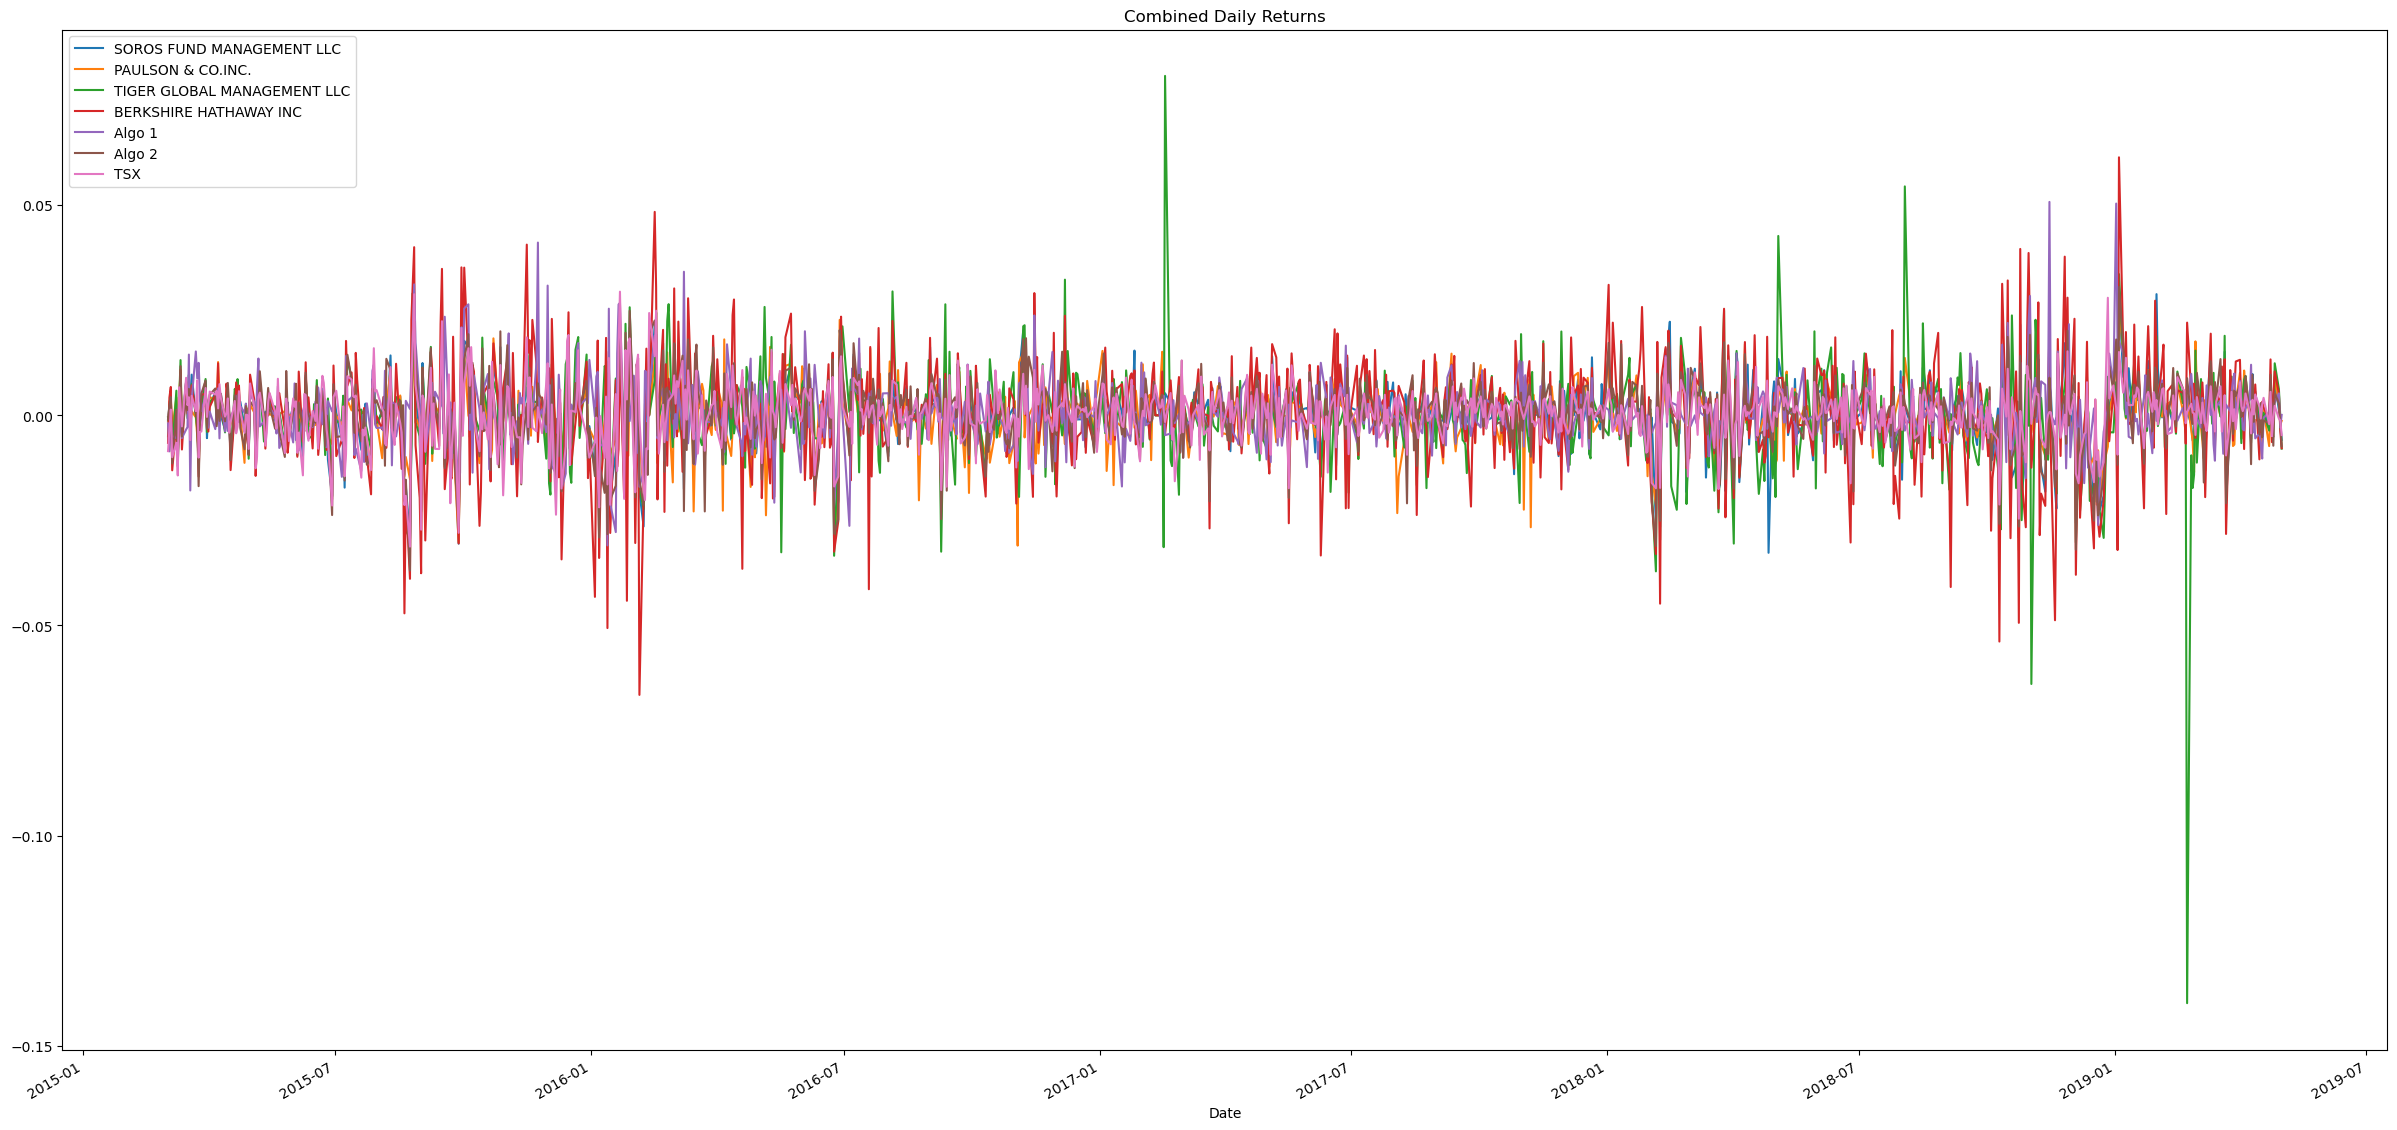

In [29]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (30,15), title = "Combined Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for All Portfolios'}, xlabel='Date'>

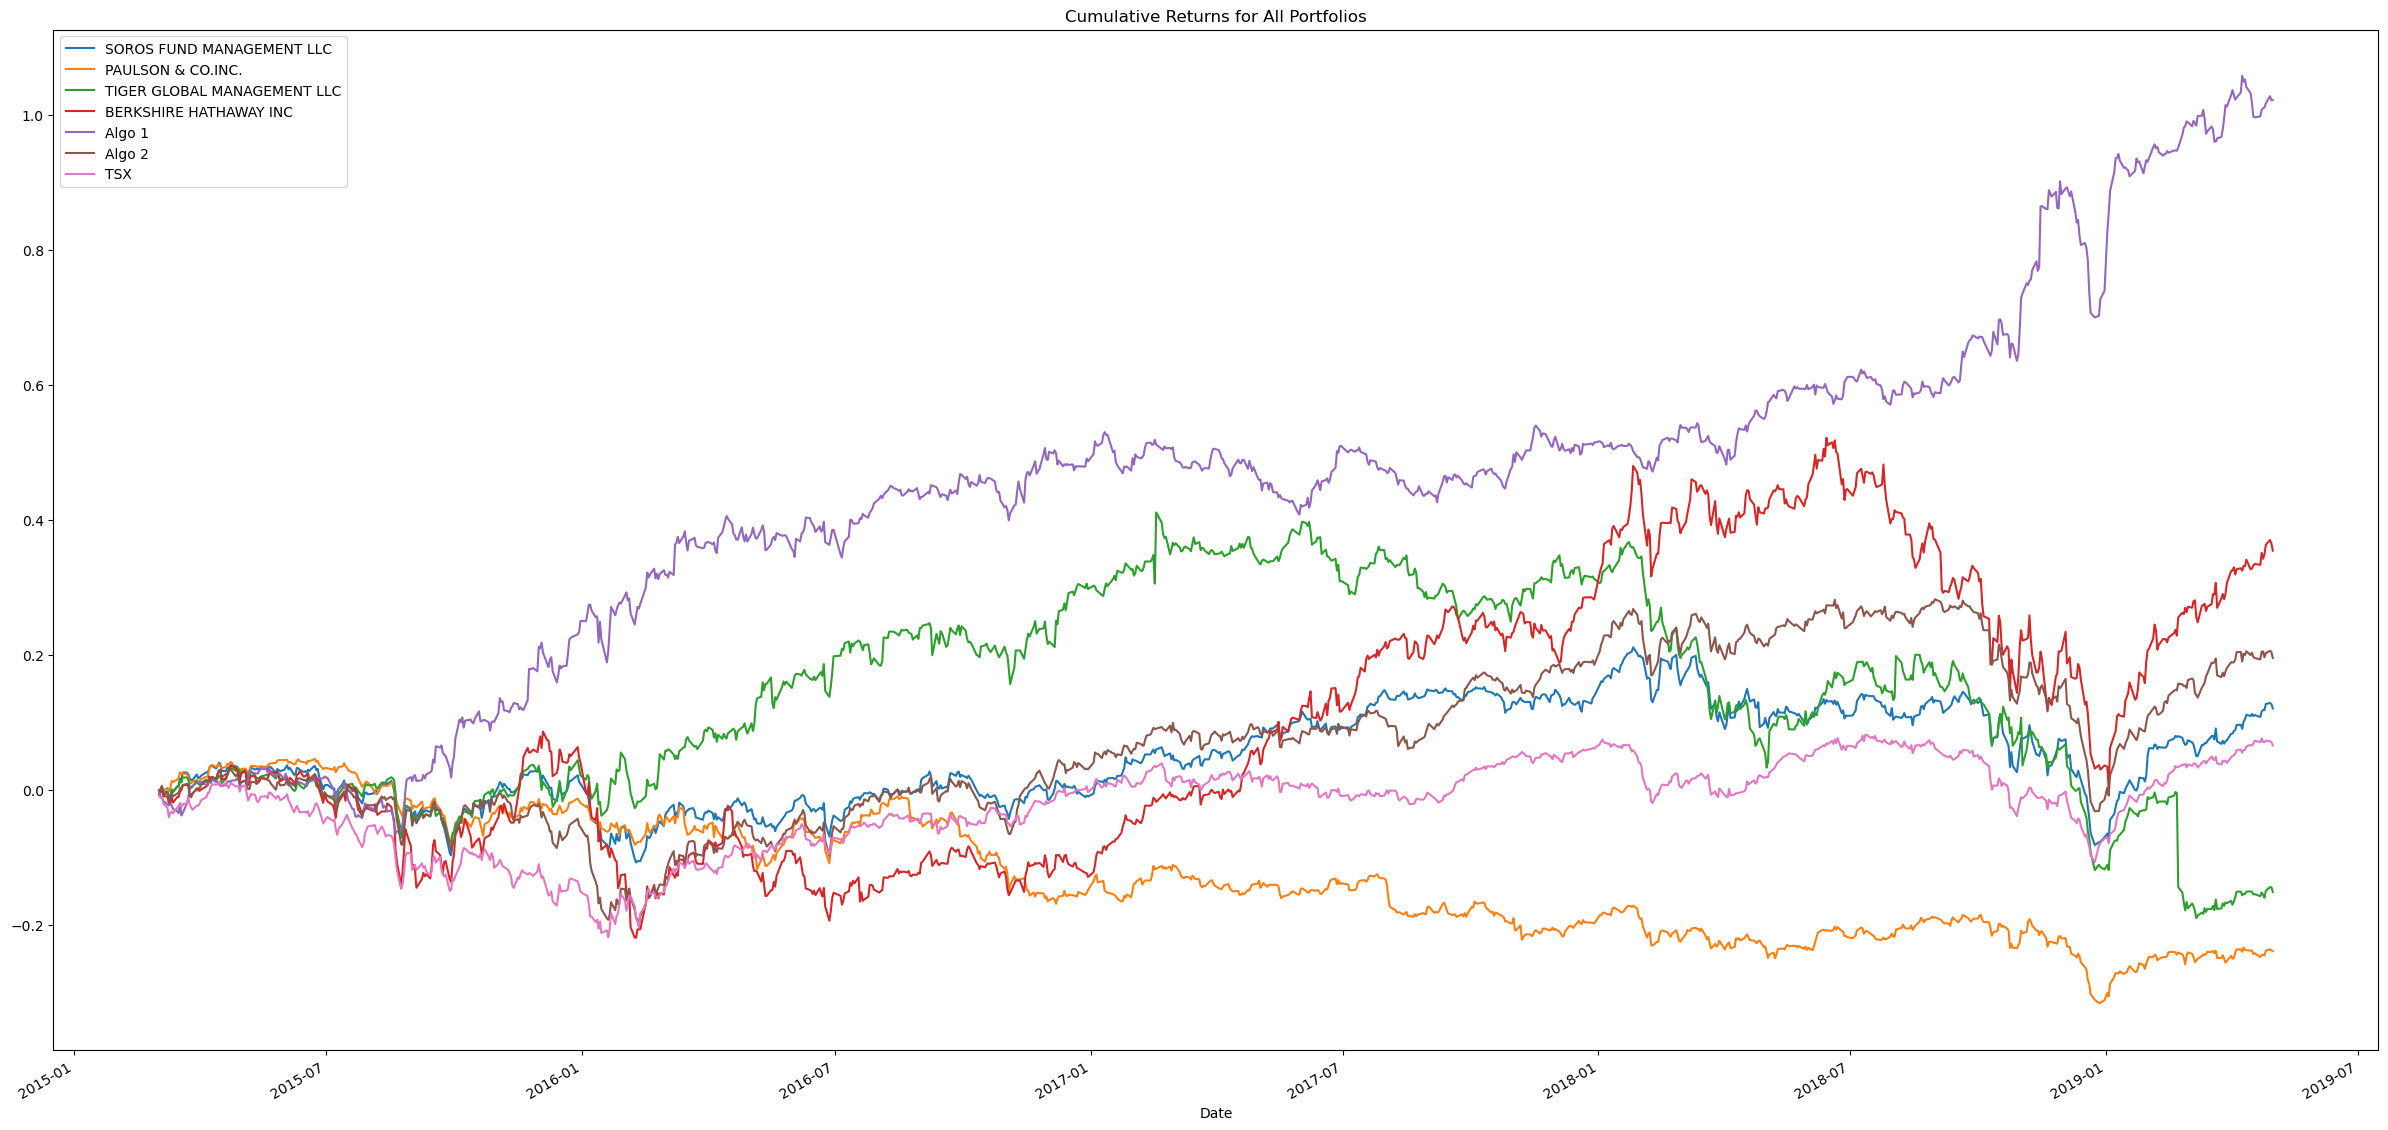

In [30]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns

cumulative_returns.plot(figsize = (30,15), title = "Cumulative Returns for All Portfolios")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

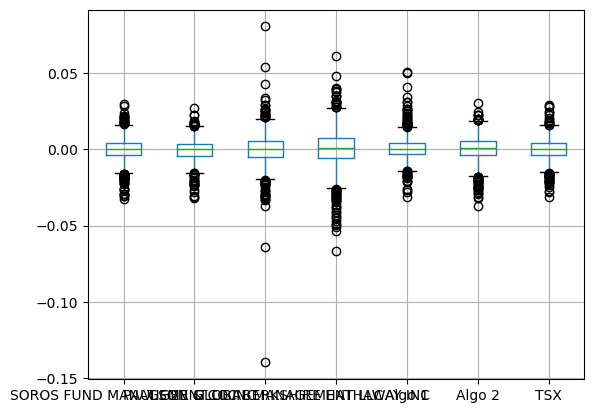

In [31]:
# Box plot to visually show risk
combined_df.boxplot()

### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TSX                            0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [33]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60

tsx = combined_df["TSX"].std()
combined_df.std()>tsx

##All results with True are riskier than S&P TSX 60

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
TSX                            False
dtype: bool

### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_combined_df = combined_df.std()*np.sqrt(256)
annualized_std_combined_df

SOROS FUND MANAGEMENT LLC      0.125241
PAULSON & CO.INC.              0.111717
TIGER GLOBAL MANAGEMENT LLC    0.174125
BERKSHIRE HATHAWAY INC         0.205208
Algo 1                         0.121422
Algo 2                         0.133222
TSX                            0.112547
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [35]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

In [36]:
rolling_std_21 = combined_df.rolling(window=21).std()

<AxesSubplot:xlabel='Date'>

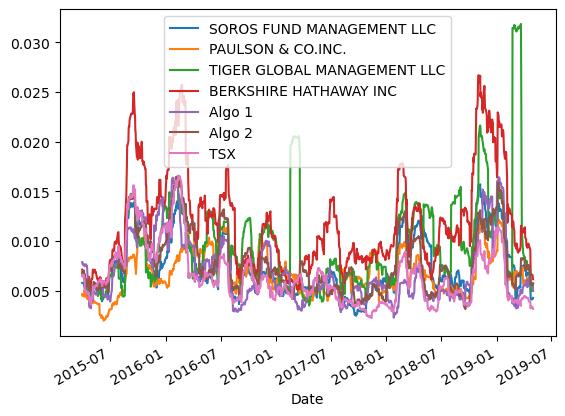

In [37]:
# Plot the rolling standard deviation
rolling_std_21.plot()

### Calculate and plot the correlation

In [38]:
# Calculate the correlation
correlation = combined_df.corr
# Display the correlation matrix
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

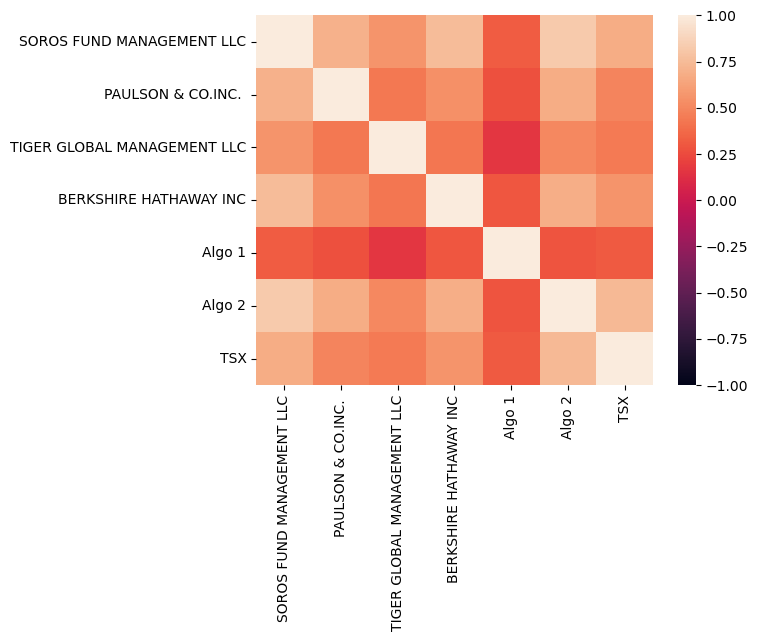

In [39]:
## Display correlation heatmap
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Tiger Global Management LLC'}, xlabel='Date'>

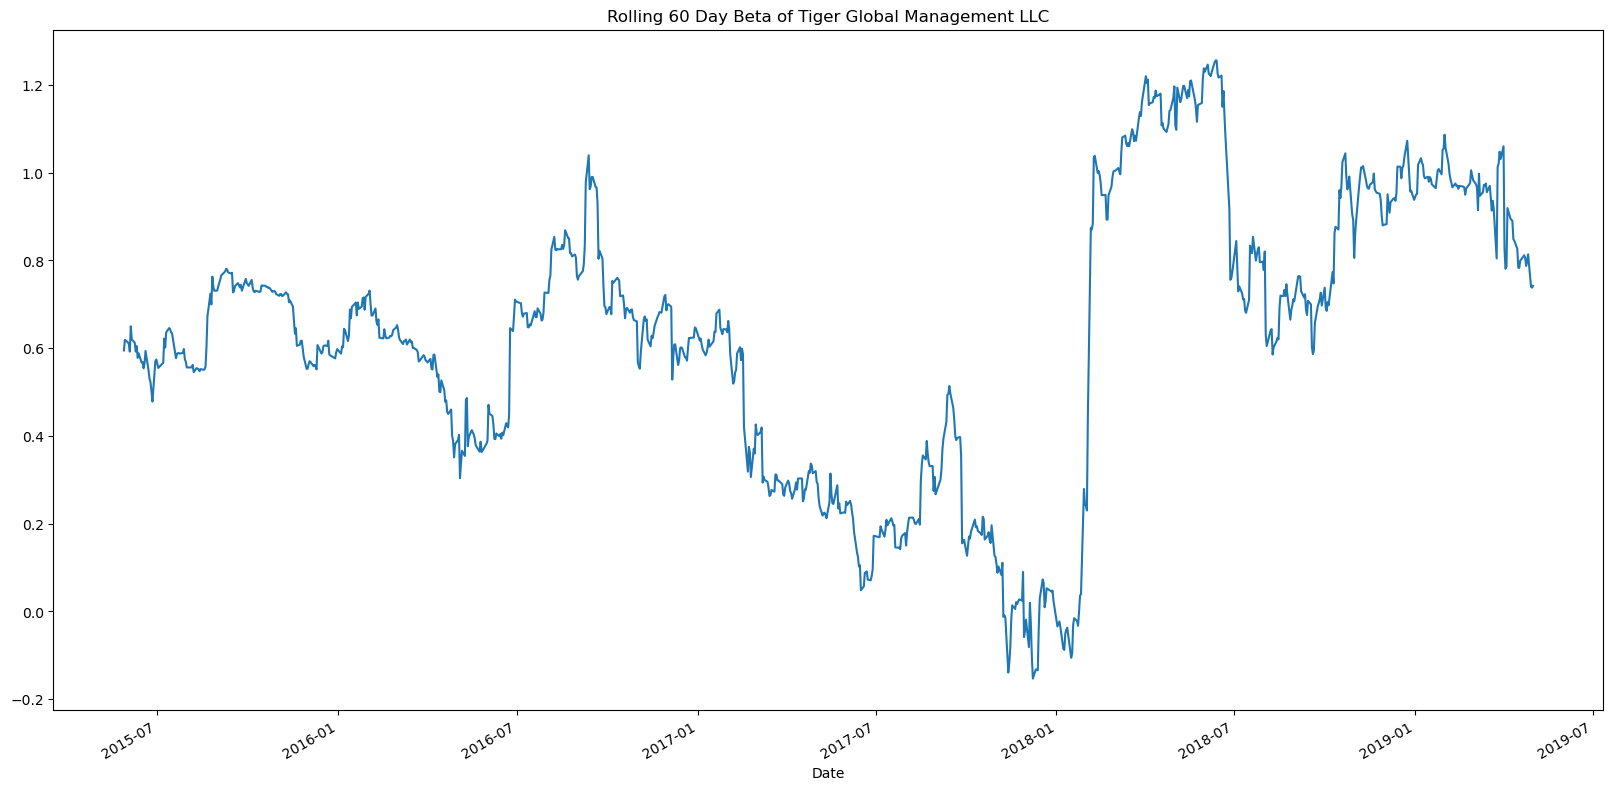

In [40]:
# Calculate covariance of a single portfolio

rolling60covariance_tiger_tsx = combined_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(combined_df["TSX"])

# Calculate variance of S&P TSX

rolling60variance = combined_df["TSX"].rolling(window=60).var()

# Computing beta

rolling60beta = rolling60covariance_tiger_tsx / rolling60variance

# Plot beta trend

rolling60beta.plot(figsize=(20, 10), title= "Rolling 60 Day Beta of Tiger Global Management LLC")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [41]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

<AxesSubplot:>

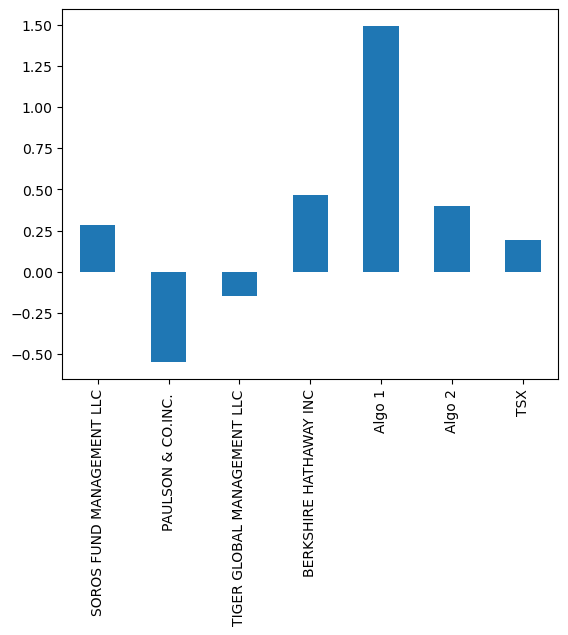

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [44]:
## Algorithmic functions seem to outperform both the market and the Whales:
## More specifically:
## Algo 1 fund outperforms all other by a signifacnt margin
## Algo 2 fund outperforms the Market and 3 of 4 of the Whale Funds

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
shop_historical_path = (r"C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\shop_historical.csv")
otex_historical_path = (r"C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\otex_historical.csv")
l_historical_path = (r"C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\l_historical.csv")

In [46]:
# Reading data from 1st stock
shop_historical_df = pd.read_csv(shop_historical_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [47]:
# Reading data from 2nd stock
otex_historical_df = pd.read_csv(otex_historical_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [48]:
# Reading data from 3rd stock
l_historical_df = pd.read_csv(l_historical_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [49]:
shop_historical_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [50]:
otex_historical_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [51]:
l_historical_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [52]:
# Combine all stocks in a single DataFrame
combined_df1 = pd.concat([shop_historical_df, otex_historical_df, l_historical_df], axis="columns", join="inner")
combined_df1.sort_index(inplace=True)
combined_df1.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [53]:
# Reset Date index
## Date index already reset during reading of data

In [54]:
# Reorganize portfolio data by having a column per symbol
columns = ["Symbol", "SHOP", "Symbol", "OTEX", "Symbol", "L"]
combined_df1.columns = columns

In [55]:
combined_df1 = combined_df1.drop(columns=["Symbol"])
combined_df1.head()

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [56]:
# Calculate daily returns
daily_returns_df1 = combined_df1.pct_change()
# Drop NAs
daily_returns_df1.dropna(inplace=True)
# Display sample data
daily_returns_df1

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969
...,...,...,...
2019-12-20,-0.005503,0.024441,0.003547
2019-12-23,-0.003118,-0.013463,-0.003240
2019-12-24,0.026915,-0.007773,-0.000148


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [57]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns1 = daily_returns_df1.dot(weights)
# Display sample data

portfolio_returns1.head()


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
# Join your returns DataFrame to the original returns DataFrame
mine_plus_others_df = pd.concat([portfolio_returns1, combined_df], axis="columns", join="inner")
mine_plus_others_df.sort_index(inplace=True)
mine_plus_others_df.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [59]:
mine_plus_others_df.rename(columns={0: 'MY PORTFOLIO'}, inplace = True)
mine_plus_others_df.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [60]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
mine_plus_others_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized `std`
annualized_std_mine_plus_others_df = combined_df.std()*np.sqrt(256)
annualized_std_mine_plus_others_df

SOROS FUND MANAGEMENT LLC      0.125241
PAULSON & CO.INC.              0.111717
TIGER GLOBAL MANAGEMENT LLC    0.174125
BERKSHIRE HATHAWAY INC         0.205208
Algo 1                         0.121422
Algo 2                         0.133222
TSX                            0.112547
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD - 21 Days'}, xlabel='Date'>

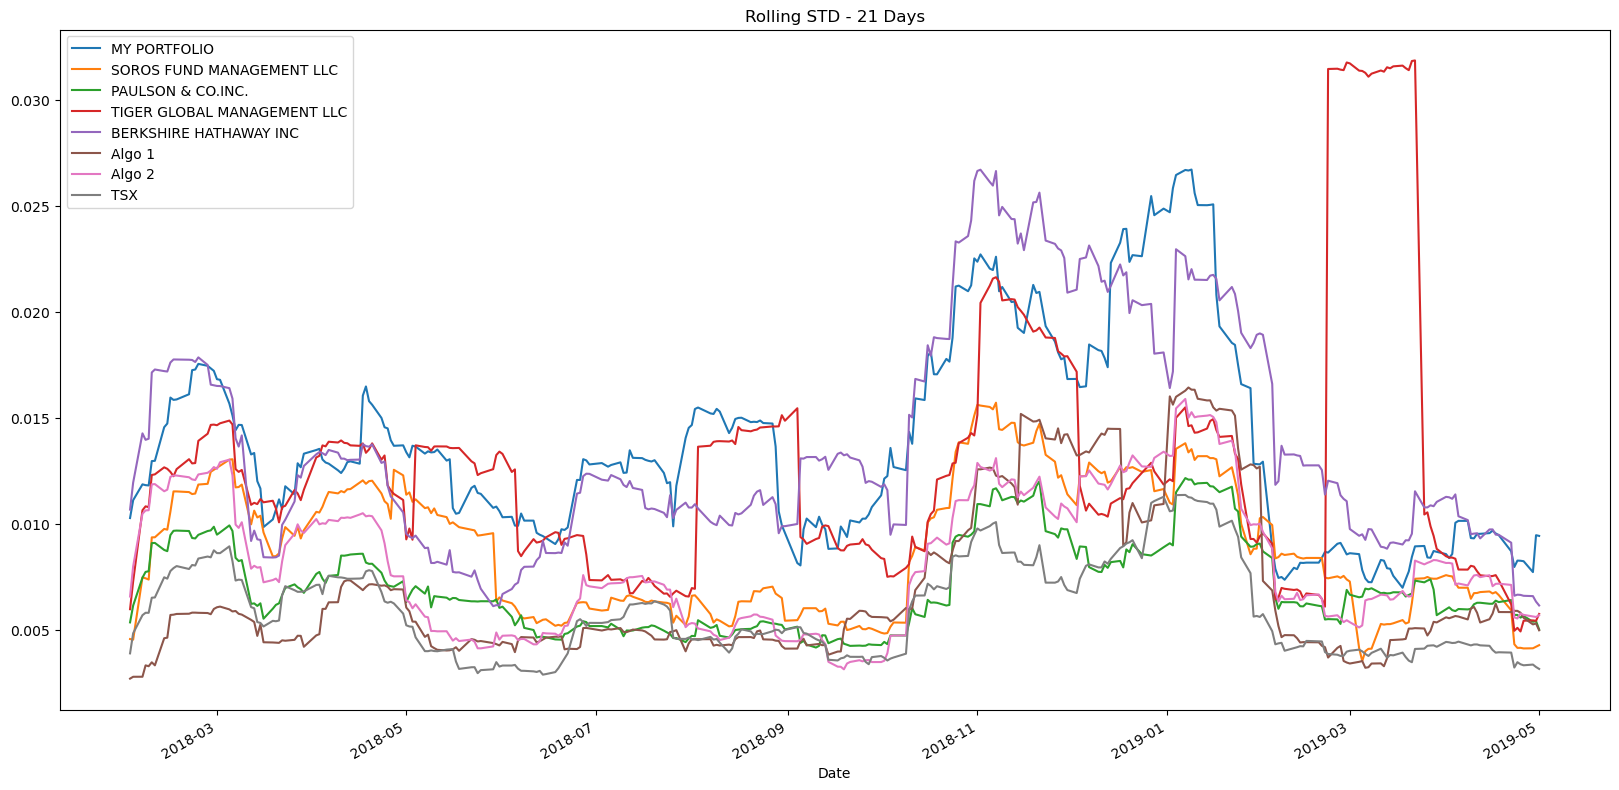

In [62]:
# Calculate rolling standard deviation
rolling21std = mine_plus_others_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling21std.plot(figsize=(20, 10), title= "Rolling STD - 21 Days")

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation My Portfolio & Others'}>

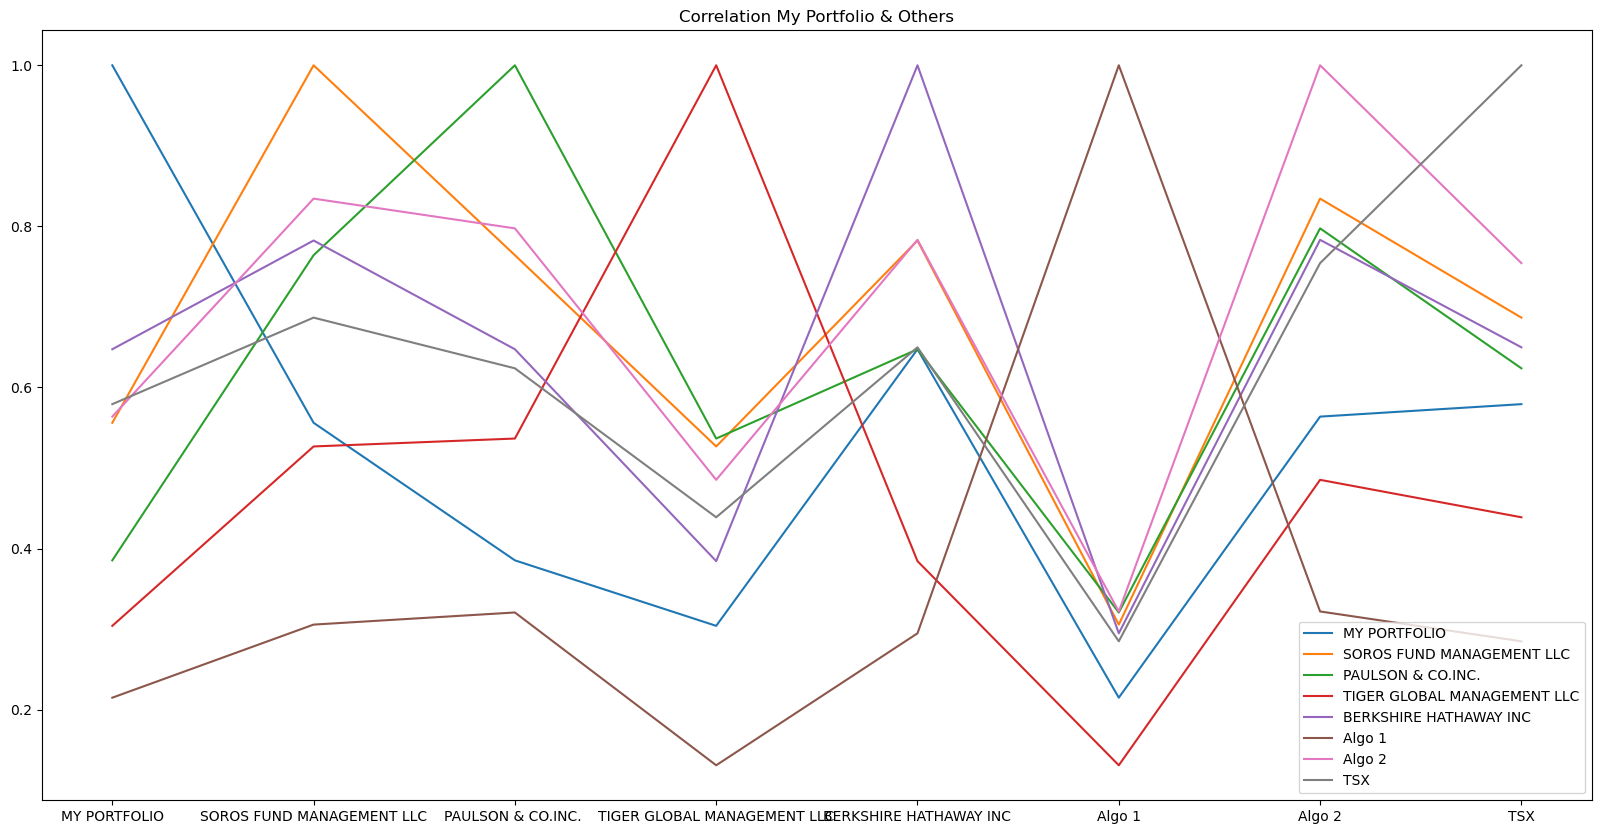

In [63]:
# Calculate and plot the correlation
mine_plus_others_correlation = mine_plus_others_df.corr()
mine_plus_others_correlation.plot(figsize=(20, 10), title= "Correlation My Portfolio & Others")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60 Day Beta of My Portfolio'}, xlabel='Date'>

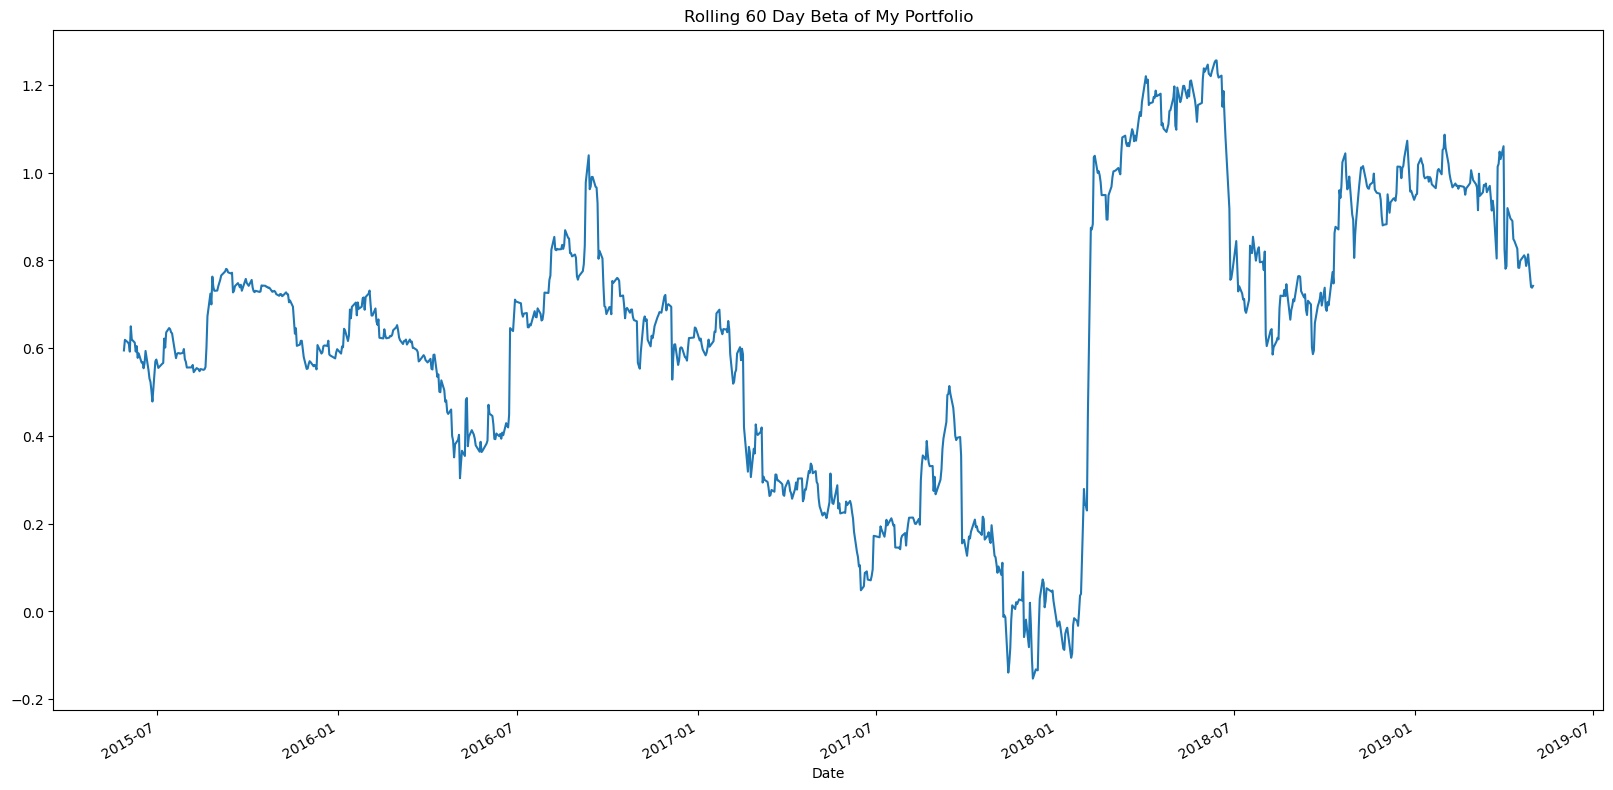

In [64]:
# Calculate and plot Beta

rolling60covariance_mine_tsx = mine_plus_others_df["MY PORTFOLIO"].rolling(window=60).cov(combined_df["TSX"])

rolling60variance_tsx= mine_plus_others_df["TSX"].rolling(window=60).var()

rolling60beta_mine_tsx= rolling60covariance_mine_tsx / rolling60variance_tsx
rolling60beta.plot(figsize=(20, 10), title= "Rolling 60 Day Beta of My Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_plus_mine = (mine_plus_others_df.mean() * 252) / (mine_plus_others_df.std() * np.sqrt(252))

<AxesSubplot:>

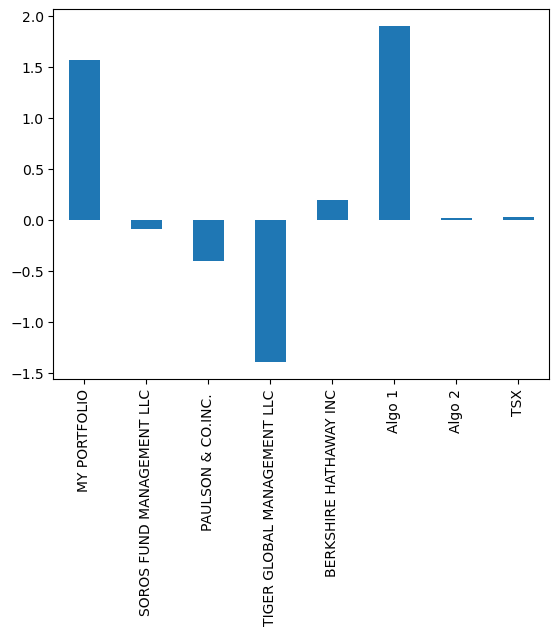

In [66]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_plus_mine.plot.bar()

### How does your portfolio do?

Write your answer here!

In [67]:
## My Portfolio is Doing Great! - It outperforms all Whale portfolios and TSX. It is almost on par with Algorithmic Portfolio: Algo 1.